# DATA CLEANING

In [44]:
import pandas as pd
import re
import string

data1 = pd.read_csv("input/IKN-3.csv")
data2 = pd.read_csv("input/IKN.csv")
data3 = pd.read_csv("input/IKN-1.csv")
data4 = pd.read_csv("input/data-exc.csv")

data = pd.concat([data1, data2, data3, data4], ignore_index=True)
data.fillna(1, inplace=True)
data_filtered = data[['full_text', 'username', 'created_at']]
print(data_filtered)

                                              full_text         username  \
0     Inilah 2 unit Rumah Tapak Jabatan Menteri yang...         RobieMrg   
1     Alhamdulillah terima kasih berkenan mengunjung...  karyanto_wibowo   
2     Pengamat Kritik 2 Proyek Milik Konglomerat Pen...     tribunkaltim   
3     Wow‼️Terlihat dari pinggir jalan Gedung-gedung...         MitraIKN   
4     Pengamat Kritik 2 Proyek Milik Konglomerat Pen...     tribunkaltim   
...                                                 ...              ...   
3356  Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...    consulting_sf   
3357  Indonesia Kantongi 29 Komitmen Investasi IKN D...    consulting_sf   
3358  Pemerintah mengaku telah mempersiapkan fasilit...         DDTCNews   
3359  Hari Terakhir, Cara Vote Logo IKN Nusantara, K...     tribunkaltim   
3360  Vote Logo IKN Nusantara Sekarang, Masih Ada Pe...     tribunkaltim   

                          created_at  
0     Fri Mar 29 11:48:49 +0000 2024  
1     Fri

In [45]:
data = data[['full_text', 'username', 'created_at']]
data.head()

,full_text,username,created_at
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024
4,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 05:40:43 +0000 2024


In [46]:
data.shape

(3361, 3)

In [47]:
data_cleaned = data.drop_duplicates(subset=['full_text'], keep='first')
print(data_cleaned.shape)

(2318, 3)


# TRANSLATE

In [50]:
from googletrans.client import Translator
translator = Translator()

data_cleaned['translated'] = data_cleaned['full_text'].str.encode('ascii', 'ignore').apply(translator.translate, src='id', dest='en')
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\3051554474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['translated'] = data_cleaned['full_text'].str.encode('ascii', 'ignore').apply(translator.translate, src='id', dest='en')


,full_text,username,created_at,translated
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,"Translated(src=id, dest=en, text=b'These are t..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,"Translated(src=id, dest=en, text=b'Alhamdulill..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,"Translated(src=id, dest=en, text=b'Observers C..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,"Translated(src=id, dest=en, text=b'Wow Seen fr..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,"Translated(src=id, dest=en, text=b'When droned..."


In [51]:
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

def clean_tweet2(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

data_cleaned['translated'] = data_cleaned['translated'].apply(getattr, args=('text',))
data_cleaned['translated'] = data_cleaned.apply(lambda x: clean_tweet2(x['translated']), axis=1)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\3669336765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['translated'] = data_cleaned['translated'].apply(getattr, args=('text',))
C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\3669336765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [55]:
def clean_text(text):
    # Hapus mention (@username) menggunakan regex
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag (#hashtag) menggunakan rege
    text = re.sub(r'#\w+', '', text)
    # Hapus URL menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Hapus emoji menggunakan regex
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]+', '', text)
    # Hapus semua tanda baca menggunakan regex
    # text = re.sub(r'[^\w\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


In [56]:
data_cleaned['cleaned'] = data_cleaned['translated'].apply(clean_text)
data_cleaned.head(10)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\3483948954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned'] = data_cleaned['translated'].apply(clean_text)


,full_text,username,created_at,translated,cleaned
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...
6,Usulan DPR tak Ikut Pindah ke IKN Nusantara Di...,tribunkaltim,Wed Mar 27 03:18:10 +0000 2024,b DPR s proposal not to take part in moving to...,b DPR s proposal not to take part in moving to...
7,Suasana Proyek Pembangunan Bandara VVIP IKN ap...,MitraIKN,Wed Mar 27 02:48:24 +0000 2024,b The atmosphere of the VVIP IKN Airport Devel...,b The atmosphere of the VVIP IKN Airport Devel...
8,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Tue Mar 26 23:39:00 +0000 2024,b Investment in IKN Nusantara is considered no...,b Investment in IKN Nusantara is considered no...
9,Inilah Hunian ASN 4 yang mana pembangunan nya ...,RobieMrg,Tue Mar 26 13:56:24 +0000 2024,b This is the ASN 4 Residence where constructi...,b This is the ASN 4 Residence where constructi...
10,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Tue Mar 26 11:47:44 +0000 2024,b Investment in IKN Nusantara is considered no...,b Investment in IKN Nusantara is considered no...


# TEXT PREPROCESSING

# CASE FOLDING

In [57]:
def preprocess_text(text):
  #ubah kalimat jadi huruf kecil
  lower_case = text.lower()
  #hapus angka dari kalimat
  result = re.sub(r"\d+", "", lower_case)
  #hapus tanda baca dari kalimat
  result = result.translate(str.maketrans("","",string.punctuation + "!!"))
  #hapus spasi awal & akhir kalimat
  result = result.strip()
  return result

In [58]:
data_cleaned['case_fold'] = data_cleaned['cleaned'].apply(preprocess_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\566120344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['case_fold'] = data_cleaned['cleaned'].apply(preprocess_text)


,full_text,username,created_at,translated,cleaned,case_fold
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...,b wow seen from the roadside the towering buil...
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...,b when droned on the roll off of a pln transfo...


# TOKENIZING

In [59]:
import nltk
nltk.download ('all')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

data_cleaned['token'] = data_cleaned['case_fold'].apply(tokenize_text)
data_cleaned.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data] 

,full_text,username,created_at,translated,cleaned,case_fold,token
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...,"[b, these, are, the, units, of, landed, houses..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...,"[b, alhamdulillah, thank, you, for, visiting, ..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...,"[b, observers, criticize, projects, owned, by,..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...,b wow seen from the roadside the towering buil...,"[b, wow, seen, from, the, roadside, the, tower..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...,b when droned on the roll off of a pln transfo...,"[b, when, droned, on, the, roll, off, of, a, p..."


# FILTERING (STOPWORD REMOVAL)

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
stopwords_set = set(stopwords.words('english'))
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_set:
      cleaned_tokens.append(token)
  return cleaned_tokens

data_cleaned['stop'] = data_cleaned['token'].apply(stopword_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\3304660425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['stop'] = data_cleaned['token'].apply(stopword_text)


,full_text,username,created_at,translated,cleaned,case_fold,token,stop
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...,"[b, these, are, the, units, of, landed, houses...","[b, units, landed, houses, ministerial, positi..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...,"[b, alhamdulillah, thank, you, for, visiting, ...","[b, alhamdulillah, thank, visiting, indonesia,..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...,"[b, observers, criticize, projects, owned, by,...","[b, observers, criticize, projects, owned, con..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...,b wow seen from the roadside the towering buil...,"[b, wow, seen, from, the, roadside, the, tower...","[b, wow, seen, roadside, towering, buildings, ..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...,b when droned on the roll off of a pln transfo...,"[b, when, droned, on, the, roll, off, of, a, p...","[b, droned, roll, pln, transformer, east, kali..."


# STEMMING

In [62]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [63]:
def stemming_text(tokens):
  result = [ps.stem(token) for token in tokens]
  return result

data_cleaned['stemmed'] = data_cleaned['stop'].apply(stemming_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\1268125935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['stemmed'] = data_cleaned['stop'].apply(stemming_text)


,full_text,username,created_at,translated,cleaned,case_fold,token,stop,stemmed
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...,"[b, these, are, the, units, of, landed, houses...","[b, units, landed, houses, ministerial, positi...","[b, unit, land, hous, ministeri, posit, comple..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...,"[b, alhamdulillah, thank, you, for, visiting, ...","[b, alhamdulillah, thank, visiting, indonesia,...","[b, alhamdulillah, thank, visit, indonesia, of..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...,"[b, observers, criticize, projects, owned, by,...","[b, observers, criticize, projects, owned, con...","[b, observ, critic, project, own, conglomer, s..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...,b wow seen from the roadside the towering buil...,"[b, wow, seen, from, the, roadside, the, tower...","[b, wow, seen, roadside, towering, buildings, ...","[b, wow, seen, roadsid, tower, build, ikn, are..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...,b when droned on the roll off of a pln transfo...,"[b, when, droned, on, the, roll, off, of, a, p...","[b, droned, roll, pln, transformer, east, kali...","[b, drone, roll, pln, transform, east, kaliman..."


# LEMMATIZING

In [64]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    result = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return result

data_cleaned['lemmatize'] = data_cleaned['stemmed'].apply(lemmatize_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22596\4181493489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['lemmatize'] = data_cleaned['stemmed'].apply(lemmatize_text)


,full_text,username,created_at,translated,cleaned,case_fold,token,stop,stemmed,lemmatize
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...,"[b, these, are, the, units, of, landed, houses...","[b, units, landed, houses, ministerial, positi...","[b, unit, land, hous, ministeri, posit, comple...","[b, unit, land, hous, ministeri, posit, comple..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...,"[b, alhamdulillah, thank, you, for, visiting, ...","[b, alhamdulillah, thank, visiting, indonesia,...","[b, alhamdulillah, thank, visit, indonesia, of...","[b, alhamdulillah, thank, visit, indonesia, of..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...,"[b, observers, criticize, projects, owned, by,...","[b, observers, criticize, projects, owned, con...","[b, observ, critic, project, own, conglomer, s...","[b, observ, critic, project, own, conglomer, s..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...,b wow seen from the roadside the towering buil...,"[b, wow, seen, from, the, roadside, the, tower...","[b, wow, seen, roadside, towering, buildings, ...","[b, wow, seen, roadsid, tower, build, ikn, are...","[b, wow, seen, roadsid, tower, build, ikn, are..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...,b when droned on the roll off of a pln transfo...,"[b, when, droned, on, the, roll, off, of, a, p...","[b, droned, roll, pln, transformer, east, kali...","[b, drone, roll, pln, transform, east, kaliman...","[b, drone, roll, pln, transform, east, kaliman..."


In [65]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_tokens = [token for sublist in data_cleaned['lemmatize'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('ikn', 3070), ('b', 2241), ('ibukotanusantara', 1465), ('iknnusantara', 945), ('nusantara', 892), ('capit', 876), ('kaltim', 815), ('via', 798), ('kalimantantimur', 654), ('ibukotanegara', 441), ('jokowi', 425), ('solusimasadepan', 410), ('ibukota', 383), ('negara', 375), ('develop', 333), ('indonesia', 304), ('kalimantan', 281), ('citi', 264), ('iknsolusimasadepannew', 262), ('new', 192), ('archipelago', 188), ('move', 184), ('presid', 171), ('investor', 170), ('nation', 169), ('futur', 152), ('govern', 147), ('asn', 146), ('build', 144), ('east', 143), ('indonesian', 140), ('invest', 133), ('project', 125), ('infrastructur', 121), ('ani', 119), ('iknsolusimasadepan', 118), ('author', 108), ('nusantaracapit', 107), ('law', 103), ('minist', 102), ('investasi', 100), ('agre', 99), ('jakarta', 96), ('realli', 96), ('solut', 95), ('support', 91), ('becom', 86), ('construct', 86), ('peopl', 86), ('ibukotabaru', 84), ('land', 83), ('also', 80), ('plan', 80), ('logo', 77), ('list', 76), ('

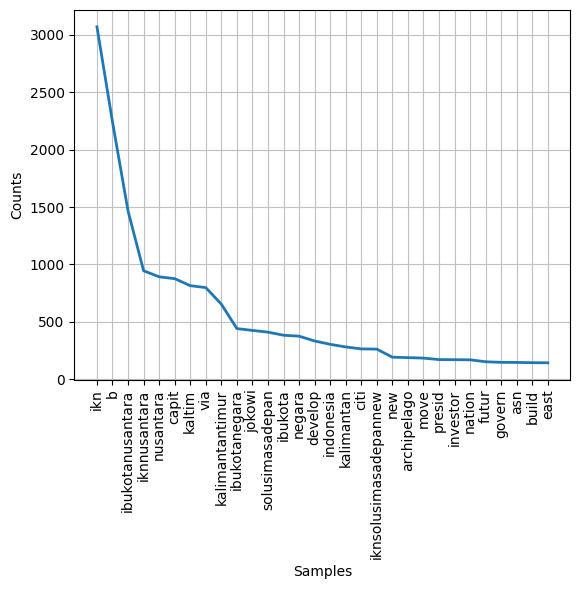

In [66]:
freq_dist.plot(30, cumulative=False)
plt.show()

# LABELLING

In [67]:
df = (
  data_cleaned
  .assign(sentiment = lambda x: x['lemmatize'].apply(lambda s: sentiment_classifier(s)))
  .assign(
    label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
    score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
  )
)

In [ ]:
df.sample(5)

In [ ]:
df.to_csv("output/preprocessed_data.csv", index = False)
df = pd.read_csv("preprocessed_data.csv")
df.shape

(2318, 10)